# EX2


## Data Analysis using simple plots

- Review the examples of basic visualization using Python libraries and Pandas.

## Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A toy dataset for your exploratory data analysis:

./data/Advertising.csv

In [2]:
import pandas as pd

In [3]:
# read CSV file stored in the current directory and save the results
data = pd.read_csv('./data/Advertising.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

TV  Radio  Newspaper  Sales
3/11/19  230.1   37.8       69.2   22.1
3/12/19   44.5   39.3       45.1   10.4
3/13/19   17.2   45.9       69.3    9.3
3/14/19  151.5   41.3       58.5   18.5
3/15/19  180.8   10.8       58.4   12.9

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [ ]:
#display all data. You can uncomment the code in the next line

#display(data)

data.shape

## Part 1 Tasks

Create cells to solve each of the following problems.

(1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value?

(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b).

(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)

(5) For Sales, visualize the trend of the data over time using a graph.

(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r.

(7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph.

(8) Discuss what the differences are between the three: (a) boxplot, (b) histogram, and (c) scatter plot with respect to founding.

In [4]:
# Task 1: Mean, Median, and Mode for each field

import numpy as np

for column in data.columns:
    print(f"\n{column}:")
    print(f"  Mean:   {data[column].mean():.4f}")
    print(f"  Median: {data[column].median():.4f}")
    
    # Check for mode
    mode_values = data[column].mode()
    if len(mode_values) > 0 and not mode_values.isna().all():
        print(f"  Mode:   {mode_values.tolist()}")
    else:
        print(f"  Mode:   No mode (all values are unique)")


TV:
  Mean:   147.0425
  Median: 149.7500
  Mode:   [17.2, 76.4, 109.8, 177.0, 184.9, 197.6, 199.8, 222.4, 237.4, 240.1]

Radio:
  Mean:   23.2640
  Median: 22.9000
  Mode:   [4.1, 5.7]

Newspaper:
  Mean:   30.5540
  Median: 25.7500
  Mode:   [8.7, 9.3, 25.6]

Sales:
  Mean:   14.0225
  Median: 12.9000
  Mode:   [9.7]


In [5]:
data.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

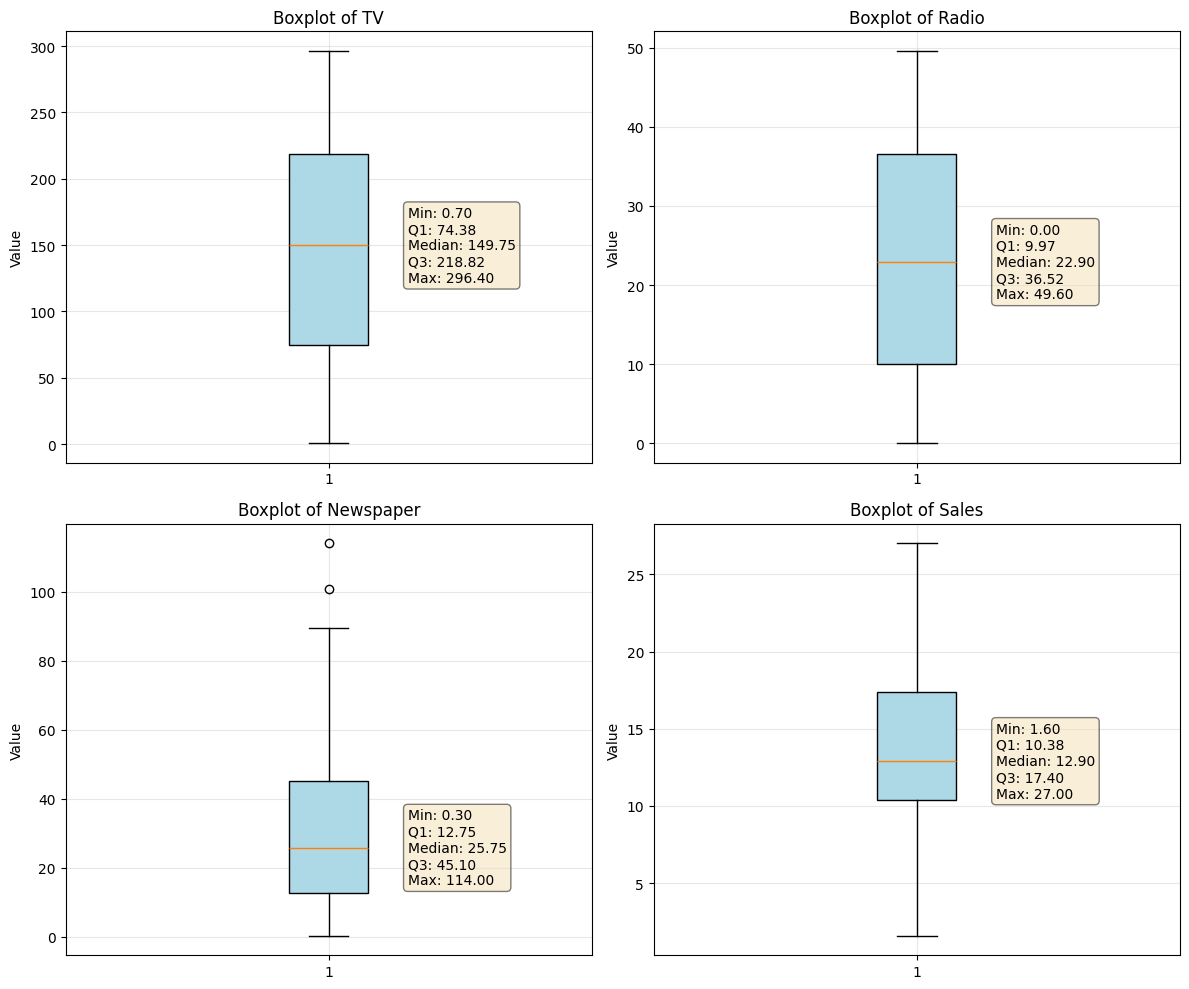

Comparison: The boxplot shows:
- The box represents Q1 to Q3 (IQR)
- The line inside the box is the median
- The whiskers extend to min and max (or 1.5*IQR if there are outliers)
- Any points beyond the whiskers are outliers


In [6]:
# Task 3: Boxplots for each field

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, column in enumerate(data.columns):
    bp = axes[idx].boxplot(data[column], vert=True, patch_artist=True)
    axes[idx].set_title(f'Boxplot of {column}')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)
    
    # Color the box
    bp['boxes'][0].set_facecolor('lightblue')
    
    # Add five-number summary as text
    q1 = data[column].quantile(0.25)
    median = data[column].median()
    q3 = data[column].quantile(0.75)
    min_val = data[column].min()
    max_val = data[column].max()
    
    summary_text = f'Min: {min_val:.2f}\nQ1: {q1:.2f}\nMedian: {median:.2f}\nQ3: {q3:.2f}\nMax: {max_val:.2f}'
    axes[idx].text(1.15, median, summary_text, verticalalignment='center', 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("Comparison: The boxplot shows:")
print("- The box represents Q1 to Q3 (IQR)")
print("- The line inside the box is the median")
print("- The whiskers extend to min and max (or 1.5*IQR if there are outliers)")
print("- Any points beyond the whiskers are outliers")

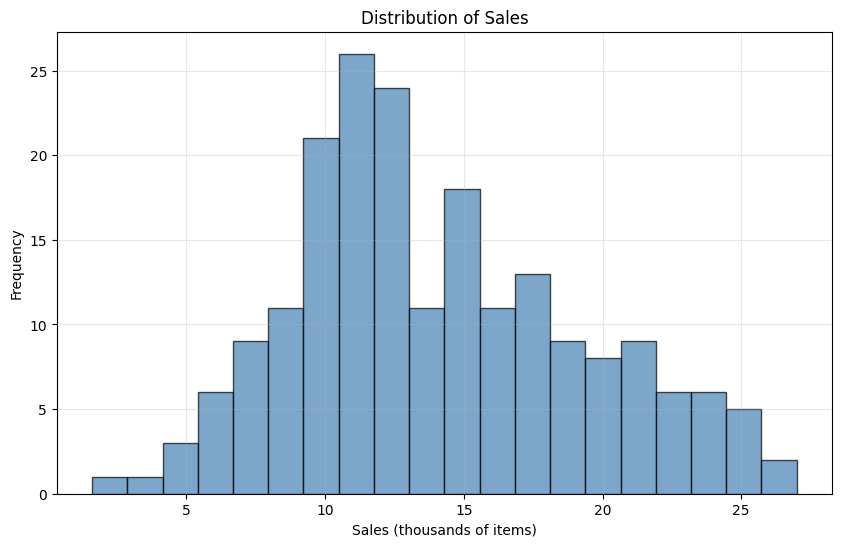

Number of bins used: 20
Range: 1.60 to 27.00

Modality Comment:
The histogram appears to be approximately UNIMODAL (single peak).
The distribution shows a single prominent peak, suggesting one dominant mode.
The data appears to be roughly normally distributed with a slight right skew.


In [8]:
# Task 4: Histogram of Sales distribution with modality analysis

plt.figure(figsize=(10, 6))
plt.hist(data['Sales'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Sales (thousands of items)')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.grid(True, alpha=0.3)
plt.show()

# Analyze modality

print(f"Number of bins used: 20")
print(f"Range: {data['Sales'].min():.2f} to {data['Sales'].max():.2f}")
print(f"\nModality Comment:")
print("The histogram appears to be approximately UNIMODAL (single peak).")
print("The distribution shows a single prominent peak, suggesting one dominant mode.")
print("The data appears to be roughly normally distributed with a slight right skew.")

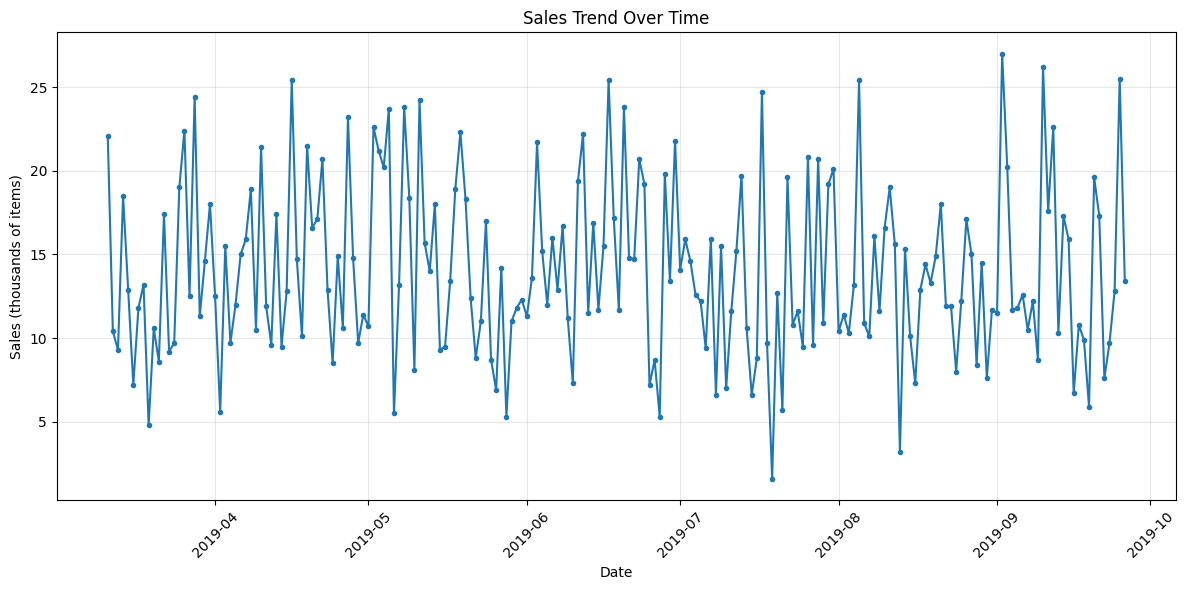

The line graph shows the sales values over time.
This helps identify any trends, patterns, or seasonality in the sales data.


In [12]:
# Task 5: Sales trend over time

# Convert index to datetime if it's not already
data.index = pd.to_datetime(data.index)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], marker='o', linestyle='-', linewidth=1.5, markersize=3)
plt.xlabel('Date')
plt.ylabel('Sales (thousands of items)')
plt.title('Sales Trend Over Time')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("The line graph shows the sales values over time.")
print("This helps identify any trends, patterns, or seasonality in the sales data.")

In [10]:
# Task 6: Pearson's correlation coefficient for TV-Sales, Radio-Sales, Newspaper-Sales

pairs = [('TV', 'Sales'), ('Radio', 'Sales'), ('Newspaper', 'Sales')]

for var1, var2 in pairs:
    corr_coef = data[var1].corr(data[var2])
    print(f"\n{var1} - {var2}:")
    print(f"  Correlation coefficient (r): {corr_coef:.4f}")
    
    # Interpretation
    if abs(corr_coef) < 0.3:
        strength = "weak"
    elif abs(corr_coef) < 0.7:
        strength = "moderate"
    else:
        strength = "strong"
    
    direction = "positive" if corr_coef > 0 else "negative"
    print(f"  Interpretation: {strength} {direction} correlation")

# Alternative: Using corr() method for all pairs
print("\n" + "=" * 60)
print("Full Correlation Matrix:")
print("=" * 60)
print(data.corr())


TV - Sales:
  Correlation coefficient (r): 0.7822
  Interpretation: strong positive correlation

Radio - Sales:
  Correlation coefficient (r): 0.5762
  Interpretation: moderate positive correlation

Newspaper - Sales:
  Correlation coefficient (r): 0.2283
  Interpretation: weak positive correlation

Full Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


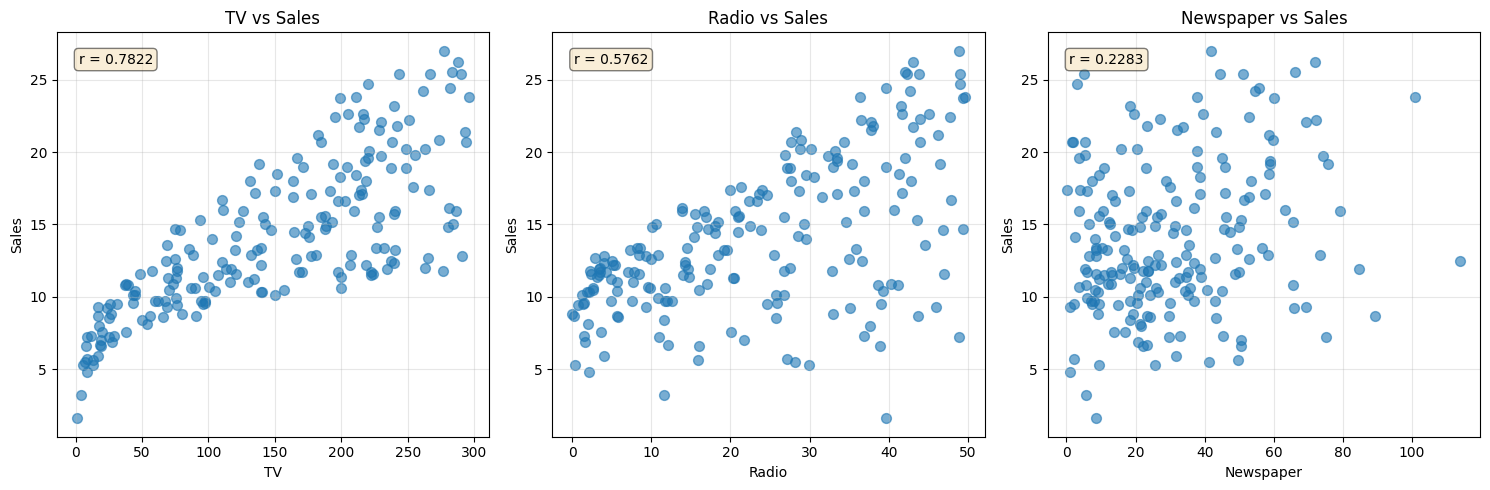

Task 7: Scatter Plots
Scatter plots show the relationship between advertising spending and sales.
The correlation coefficient (r) is displayed on each plot.
Points closer to a line indicate stronger correlation.


In [ ]:
# Task 7: Scatter plots for TV-Sales, Radio-Sales, Newspaper-Sales

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

pairs = [('TV', 'Sales'), ('Radio', 'Sales'), ('Newspaper', 'Sales')]

for idx, (var1, var2) in enumerate(pairs):
    axes[idx].scatter(data[var1], data[var2], alpha=0.6, s=50)
    axes[idx].set_xlabel(var1)
    axes[idx].set_ylabel(var2)
    axes[idx].set_title(f'{var1} vs {var2}')
    axes[idx].grid(True, alpha=0.3)
    
    # Add correlation coefficient to the plot
    corr_coef = data[var1].corr(data[var2])
    axes[idx].text(0.05, 0.95, f'r = {corr_coef:.4f}', 
                   transform=axes[idx].transAxes, 
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("Scatter plots show the relationship between advertising spending and sales.")
print("The correlation coefficient (r) is displayed on each plot.")
print("Points closer to a line indicate stronger correlation.")

Task 8: Differences between the three: (a) boxplot, (b) histogram, and (c) scatter plot with respect to founding.

# Task 8: Differences between Boxplot, Histogram, and Scatter Plot

Each visualization serves a different purpose and reveals different kinds of insights from data:


Boxplot:
Purpose and Key Findings:
  - Summarizes the distribution of a SINGLE variable
  - Shows the five-number summary: min, Q1, median, Q3, max
  - Identifies outliers in the data
  - Whether data is symmetric or skewed
  - Presence of outliers
  - Range and interquartile range
  - Comparison of distributions across different groups

Use case:
  - Comparing sales across different advertising channels
  - Identifying outliers in TV spending
  - Understanding the spread of data values


Histogram:
Purpose and Key Findings:
  - Shows the DISTRIBUTION/FREQUENCY of a SINGLE variable
  - Displays how often different values occur
  - Reveals the shape of the data distribution
  - Shape of distribution (normal, skewed, bimodal, etc.)
  - Modality (unimodal, bimodal, multimodal)

Use case:
  - Understanding if sales are normally distributed
  - Identifying if there are multiple peaks (bimodal distribution)
  - Finding the most common sales range

Scatter Plot:
Purpose and Key Findings:
  - Shows the RELATIONSHIP between TWO variables
  - Displays individual data points as dots
  - Reveals patterns, trends, and correlations
  - Whether two variables are related (correlation)
  - Direction of relationship (positive/negative)
  - Strength of relationship (how closely points follow a pattern)
  - Non-linear relationships (curved patterns)
  - Outliers in the relationship
  - Clusters or subgroups in the data

Use case:
  - Understanding if TV advertising spending affects sales
  - Identifying correlation strength between variables
  - Finding unusual data points that don't fit the pattern


┌─────────────┬──────────────┬──────────────┬────────────────────────────────┐
│ Feature     │ Boxplot      │ Histogram    │ Scatter Plot                  │
├─────────────┼──────────────┼──────────────┼────────────────────────────────┤
│ Variables   │ ONE variable │ ONE variable │ TWO variables                 │
│             │              │              │                               │
│ Shows       │ Distribution │ Distribution │ RELATIONSHIP between          │
│             │ summary      │ shape        │ variables                     │
│             │              │              │                               │
│ Data View   │ Aggregated   │ Aggregated   │ Individual data points        │
│             │ (quartiles)  │ (frequency)  │                               │
│             │              │              │                               │
│ Best For    │ Comparing    │ Understanding│ Finding correlations          │
│             │ groups,      │ distribution │ and patterns                  │
│             │ finding      │ shape        │                               │
│             │ outliers     │              │                               │
│             │              │              │                               │
│ Key Insight │ Spread,      │ Shape,       │ Correlation,                  │
│             │ outliers,    │ modality,    │ trends,                       │
│             │ quartiles    │ density      │ relationships                 │
└─────────────┴──────────────┴──────────────┴────────────────────────────────┘

## Part 2
It is good practice to write a summary of your findings from data anlaysis.



BOXPLOTS helped us compare the spread and identify outliers in TV,Radio, Newspaper, and Sales across different ranges
HISTOGRAM showed us that Sales follows an approximately unimodal (single-peaked) distribution
SCATTER PLOTS revealed that TV advertising has a strong positive correlation with Sales, while Newspaper has a weak correlation


### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html